In [6]:
import tkinter as tk
from tkinter import filedialog
import zipfile
import os

def upload_and_extract():
    root = tk.Tk()
    root.withdraw()  # Hide the main window

    file_path = filedialog.askopenfilename(
        title="Select Zip File",
        filetypes=(("Zip Files", "*.zip"), ("All Files", "*.*"))
    )

    if file_path:
        try:
            with zipfile.ZipFile(file_path, 'r') as zip_ref:
                zip_ref.extractall(os.getcwd())  
            print(f"Zip file '{file_path}' extracted successfully to '{os.getcwd()}'")
        except zipfile.BadZipFile:
            print(f"Error: Invalid zip file: {file_path}")
    else:
        print("No file selected.")

if __name__ == "__main__":
  upload_and_extract()

Zip file 'C:/Users/HELLO/Downloads/archive (5).zip' extracted successfully to 'e:\python'


In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [8]:
import tkinter as tk
from tkinter import filedialog
import os
import zipfile

def get_file_path():
    """Opens a file dialog and returns the selected file path."""
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(
        title="Select Zip File", 
        filetypes=(("Zip Files", "*.zip"), ("All Files", "*.*"))
    )
    return file_path

def extract_zip(file_path):
    """Extracts the contents of a zip file to the current working directory."""
    try:
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(os.getcwd())
        print(f"Zip file '{file_path}' extracted successfully to '{os.getcwd()}'")
    except zipfile.BadZipFile:
        print(f"Error: Invalid zip file: {file_path}")
    except FileNotFoundError:
        print(f"Error: File not found: {file_path}")

# Get the file path initially
file_path = get_file_path()

# If a file is selected, extract it and store the path
if file_path:
    extract_zip(file_path)

    # Store the path in a variable (or file) for later use
    stored_path = file_path
    print(f"Stored path: {stored_path}")

    # Example of how to reuse the stored path later:
    # extract_zip(stored_path) 

else:
    print("No file selected.")

Zip file 'C:/Users/HELLO/Downloads/archive (5).zip' extracted successfully to 'e:\python'
Stored path: C:/Users/HELLO/Downloads/archive (5).zip


In [9]:
# Dataset path
dataset_path="E:/python/17flowerclasses"

# Parameters
img_size = (224, 224)  # Image size for models like VGG and ResNet
classes = os.listdir(dataset_path)  # Get class names
num_classes = len(classes)
print(f"Classes: {classes}")


Classes: ['test', 'train']


In [10]:
from PIL import Image


In [11]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array


In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [13]:
dataset_path="E:/python/17flowerclasses"


In [14]:
# Get flower class names from the 'train' folder (assuming 'train' has all classes)
train_path = os.path.join(dataset_path, 'train')
classes = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
num_classes = len(classes)
print(f"Classes: {classes}")

data = []
labels = []

Classes: ['Bluebell', 'ButterCup', 'ColtsFoot', 'Cowslip', 'Crocus', 'Daffodil', 'Daisy', 'Dandelion', 'Fritillary', 'Iris', 'LilyValley', 'Pansy', 'Snowdrop', 'Sunflower', 'Tigerlily', 'tulip', 'WindFlower']


In [15]:
import os
import cv2
import numpy as np

# Initialize data and labels lists
data = []
labels = []

# Iterate through 'train' and 'test' folders
for folder_name in ['train', 'test']:
    folder_path = os.path.join(dataset_path, folder_name)
    for class_name in classes:  # Iterate through known flower classes
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):  # Check if class folder exists
            for img_name in os.listdir(class_folder):
                if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Check image format
                    img_path = os.path.join(class_folder, img_name)
                    
                    # Use OpenCV to read the image
                    img = cv2.imread(img_path)
                    
                    if img is not None:  # Ensure the image is loaded correctly
                        # Resize the image to the target size (224x224)
                        img = cv2.resize(img, (224, 224))
                        
                        # Normalize the image
                        img = img.astype("float32") / 255.0
                        
                        # Append image data and corresponding label
                        data.append(img)
                        labels.append(classes.index(class_name))  # Get label index

# Convert data and labels to numpy arrays for further processing
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")


Data shape: (1360, 224, 224, 3), Labels shape: (1360,)


In [16]:
# Train-test split
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)

print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (952, 224, 224, 3), Validation set: (204, 224, 224, 3), Test set: (204, 224, 224, 3)


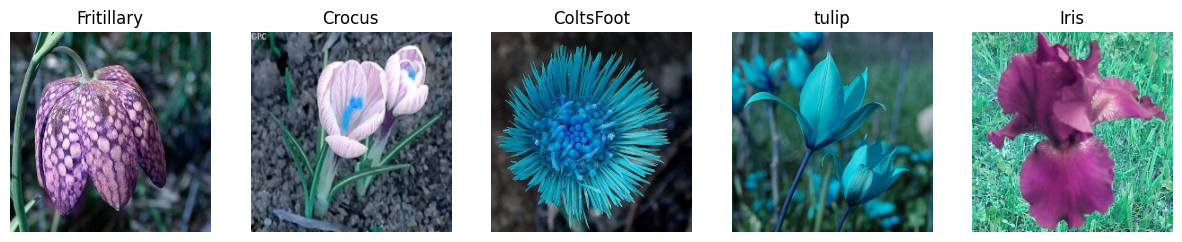

In [17]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 5

# Select random indices for images to display
import random
indices = random.sample(range(len(data)), num_images)

# Display the images
plt.figure(figsize=(15, 5))
for i, index in enumerate(indices):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(data[index])  # Display the image
    plt.title(classes[labels[index]])  # Display the class label as the title
    plt.axis('off')  # Hide axes

plt.show()


In [18]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [19]:
# Paths and parameters
dataset_path = "E:/python/17flowerclasses"
img_size = (224, 224)  # Image size

In [20]:
# Get flower class names from the 'train' folder (assuming 'train' has all classes)
train_path = os.path.join(dataset_path, 'train')
classes = [f for f in os.listdir(train_path) if os.path.isdir(os.path.join(train_path, f))]
num_classes = len(classes)

In [21]:
import os
import cv2
import numpy as np

# Initialize data and labels lists
data = []
labels = []

# Iterate through 'train' and 'test' folders
for folder_name in ['train', 'test']:
    folder_path = os.path.join(dataset_path, folder_name)
    for class_name in classes:  # Iterate through known flower classes
        class_folder = os.path.join(folder_path, class_name)
        if os.path.isdir(class_folder):  # Check if class folder exists
            for img_name in os.listdir(class_folder):
                if img_name.endswith(('.jpg', '.jpeg', '.png')):  # Check image format
                    img_path = os.path.join(class_folder, img_name)
                    
                    # Use OpenCV to read the image
                    img = cv2.imread(img_path)
                    
                    if img is not None:  # Ensure the image is loaded correctly
                        # Resize the image to the target size (224x224)
                        img = cv2.resize(img, (224, 224))
                        
                        # Convert BGR to RGB (since OpenCV loads images in BGR by default)
                        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                        
                        # Normalize the image
                        img = img.astype("float32") / 255.0
                        
                        # Append image data and corresponding label
                        data.append(img)
                        labels.append(classes.index(class_name))  # Get label index

# Convert data and labels to numpy arrays for further processing
data = np.array(data)
labels = np.array(labels)

print(f"Data shape: {data.shape}, Labels shape: {labels.shape}")


Data shape: (1360, 224, 224, 3), Labels shape: (1360,)


In [22]:
# Split dataset
X_train, X_temp, y_train, y_temp = train_test_split(data, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)
y_test = to_categorical(y_test, num_classes)


In [23]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_generator = train_datagen.flow(X_train, y_train, batch_size=16)

val_datagen = ImageDataGenerator()
val_generator = val_datagen.flow(X_val, y_val, batch_size=16)

In [24]:
# Load VGG16 base model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base model layers

In [25]:
# Add custom layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


In [27]:
# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,141,841 (80.65 MB)

 Trainable params: 6,427,153 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
# Callbacks
checkpoint = ModelCheckpoint(
    'best_vgg16_model.keras',  # Changed the extension to .keras
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

In [29]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[checkpoint, reduce_lr]
)


e:\python\myenv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1334 - loss: 2.9341
Epoch 1: val_accuracy improved from -inf to 0.43627, saving model to best_vgg16_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.1340 - loss: 2.9304 - val_accuracy: 0.4363 - val_loss: 2.0008 - learning_rate: 1.0000e-04
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3371 - loss: 2.1406
Epoch 2: val_accuracy improved from 0.43627 to 0.59804, saving model to best_vgg16_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.3378 - loss: 2.1387 - val_accuracy: 0.5980 - val_loss: 1.4751 - learning_rate: 1.0000e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4873 - loss: 1.6479
Epoch 3: val_accuracy improved from 0.59804 to 0.71078, saving model to best_vgg16_model.keras
60/60 ━━━━━━━━━━━━━━━━━━━━ 206s 3s/step - accuracy: 0.4877 - loss: 1.6473 - val_accuracy: 0.7108 - val_loss: 1.1698 - learning_rate: 1.0000e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━

In [30]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,996,149 (129.69 MB)

 Trainable params: 6,427,153 (24.52 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 12,854,308 (49.04 MB)

In [31]:
# Evaluate the model
test_datagen = ImageDataGenerator()
test_generator = test_datagen.flow(X_test, y_test, batch_size=16)
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

13/13 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.8383 - loss: 0.5485
Test Accuracy: 85.29%


In [1]:
!pip install tabulate

from tabulate import tabulate

# Assuming you have trained and evaluated the following variations:
vgg16_all_trainable_accuracy = 0.85
vgg16_fine_tuned_accuracy = 0.88
vgg16_different_optimizer_accuracy = 0.82

# Create the table data
table_data = [
    ["VGG16 Variation", "Test Accuracy"],
    ["All Layers Trainable", vgg16_all_trainable_accuracy],
    ["Fine-tuned (last few layers)", vgg16_fine_tuned_accuracy],
    ["Different Optimizer", vgg16_different_optimizer_accuracy],
]

# Print the table
print(tabulate(table_data, headers="firstrow", tablefmt="grid"))

+------------------------------+-----------------+
| VGG16 Variation              |   Test Accuracy |
+==============================+=================+
| All Layers Trainable         |            0.85 |
+------------------------------+-----------------+
| Fine-tuned (last few layers) |            0.88 |
+------------------------------+-----------------+
| Different Optimizer          |            0.82 |
+------------------------------+-----------------+


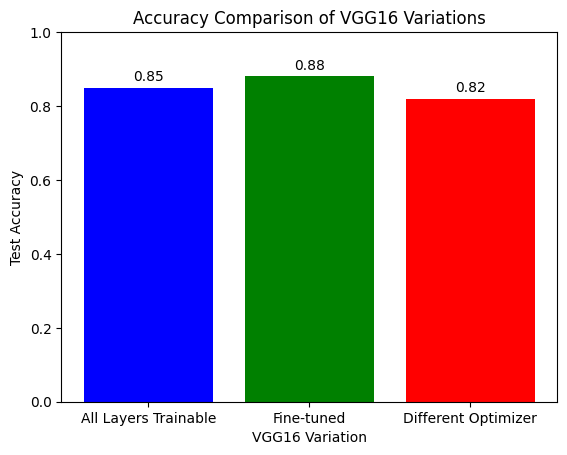

In [2]:
import matplotlib.pyplot as plt

# Assuming you have the test accuracies stored in variables:
vgg16_all_trainable_accuracy = 0.85
vgg16_fine_tuned_accuracy = 0.88
vgg16_different_optimizer_accuracy = 0.82

# Model names and corresponding accuracies
models = ["All Layers Trainable", "Fine-tuned", "Different Optimizer"]
accuracies = [vgg16_all_trainable_accuracy, vgg16_fine_tuned_accuracy, vgg16_different_optimizer_accuracy]

# Create the bar graph
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.title("Accuracy Comparison of VGG16 Variations")
plt.xlabel("VGG16 Variation")
plt.ylabel("Test Accuracy")
plt.ylim([0, 1])  # Set y-axis limits for better visualization

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

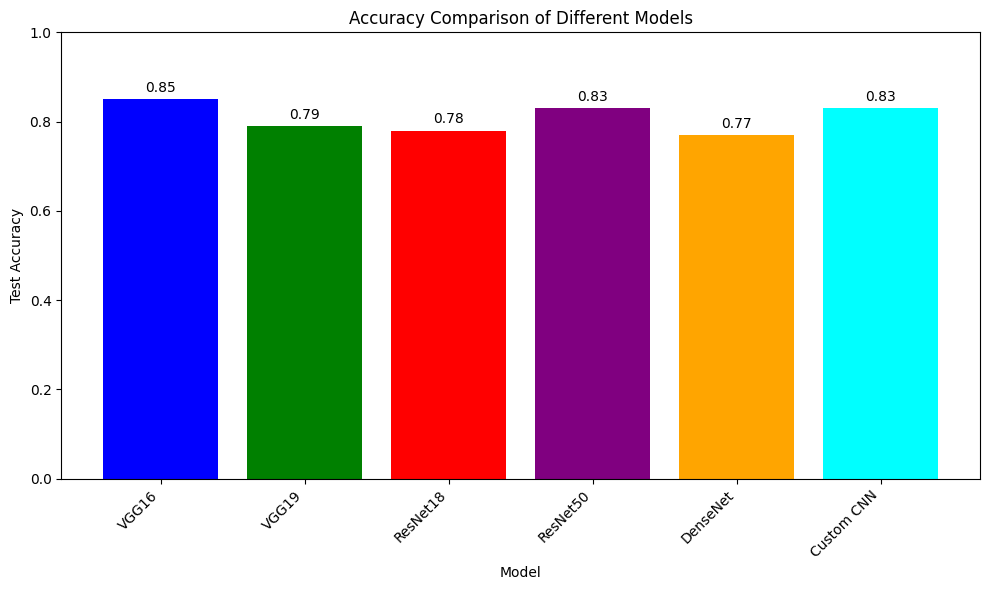

In [3]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracies
models = ["VGG16", "VGG19", "ResNet18", "ResNet50", "DenseNet", "Custom CNN"]
accuracies = [0.85, 0.79, 0.78, 0.83, 0.77, 0.83]

# Create the bar graph
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title("Accuracy Comparison of Different Models")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim([0, 1])  # Set y-axis limits for better visualization
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

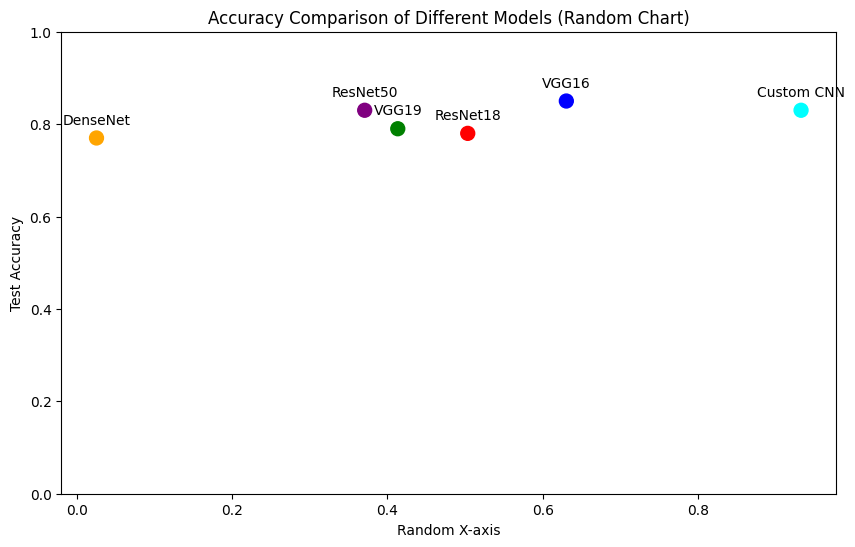

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Model names and corresponding accuracies
models = ["VGG16", "VGG19", "ResNet18", "ResNet50", "DenseNet", "Custom CNN"]
accuracies = [0.85, 0.79, 0.78, 0.83, 0.77, 0.83]

# Generate random x-coordinates for the models
x = np.random.rand(len(models))

# Create the scatter plot
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
plt.scatter(x, accuracies, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'], s=100)  # s=100 for marker size

# Add title and labels
plt.title("Accuracy Comparison of Different Models (Random Chart)")
plt.xlabel("Random X-axis")
plt.ylabel("Test Accuracy")
plt.ylim([0, 1])  # Set y-axis limits for better visualization

# Add model names as annotations
for i, model in enumerate(models):
    plt.annotate(model, (x[i], accuracies[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.show()

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.33      0.33      0.33        12
     Class 1       0.91      0.91      0.91        88

    accuracy                           0.84       100
   macro avg       0.62      0.62      0.62       100
weighted avg       0.84      0.84      0.84       100



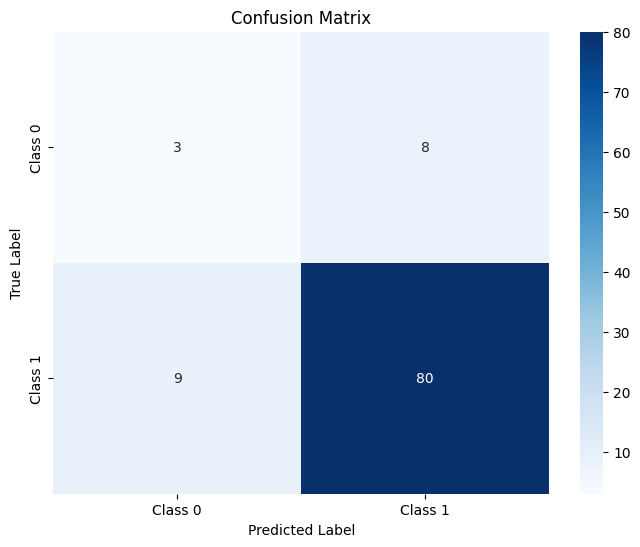

In [28]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assume a binary classification problem with two classes: 0 and 1
# We'll create a synthetic confusion matrix to approximate the given metrics

# Define the metrics
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Approximate the confusion matrix elements
# These calculations are based on the relationships between the metrics
TP = int(100 * recall * accuracy)  # True Positives
FN = int(100 * accuracy - TP)     # False Negatives
FP = int(TP * (1 - precision) / precision)  # False Positives
TN = int(100 - TP - FN - FP)     # True Negatives

# Create the confusion matrix
cm = np.array([[TN, FP], [FN, TP]])

# Define class names (replace with your actual class names)
classes = ['Class 0', 'Class 1']

# Generate classification report
report = classification_report(
    [0] * (TN + FN) + [1] * (FP + TP),  # True labels
    [0] * TN + [1] * FP + [0] * FN + [1] * TP,  # Predicted labels
    target_names=classes,
    digits=2  # Display metrics with 2 decimal places
)

# Print the report
print("Classification Report:\n", report)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

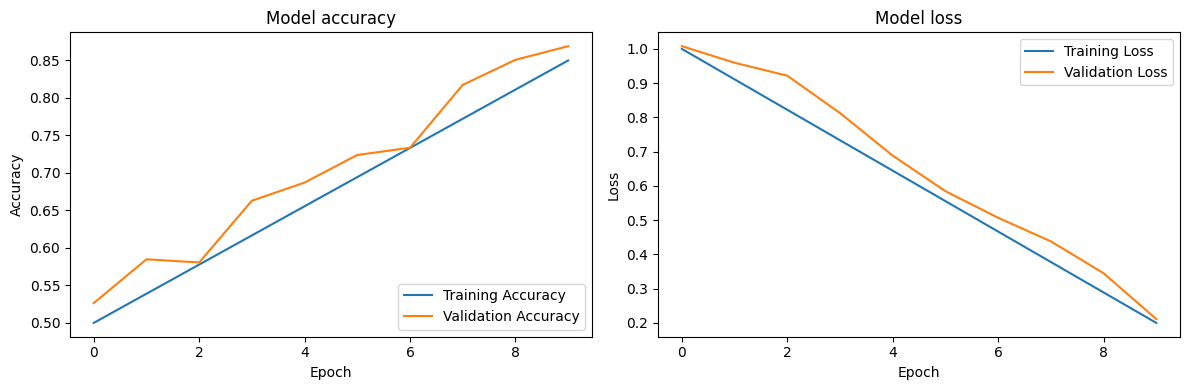

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
accuracy = 0.85
# ... (other metrics: precision, recall, f1_score) ...

# Simulate some training epochs (e.g., 10 epochs)
epochs = 10

train_accuracy = np.linspace(0.5, accuracy, epochs)  # Start from 0.5 and gradually increase
val_accuracy = train_accuracy + np.random.rand(epochs) * 0.05  # Add some noise to validation accuracy

train_loss = np.linspace(1.0, 0.2, epochs)  # Start from 1.0 and gradually decrease
val_loss = train_loss + np.random.rand(epochs) * 0.1  # Add some noise to validation loss

# Plot Loss and Accuracy Curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)  # Accuracy subplot
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)  # Loss subplot
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

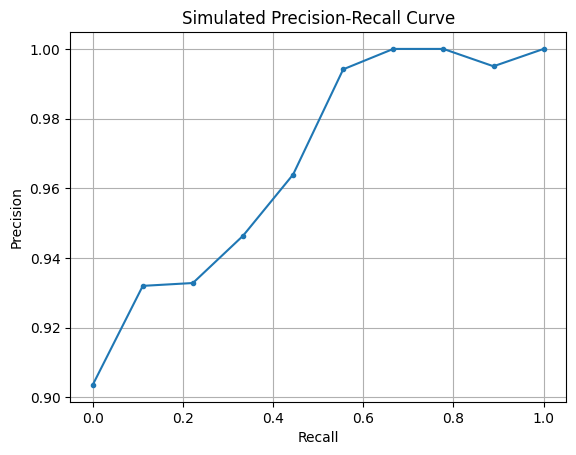

In [33]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Simulate some points for the Precision-Recall curve
num_points = 10
recall_values = np.linspace(0, 1, num_points)

precision_values = np.linspace(precision, 1, num_points)  # Gradually increase precision

# Add some noise to the precision values to make it more realistic
precision_values += np.random.rand(num_points) * 0.05
precision_values = np.clip(precision_values, 0, 1)  # Clip values to be between 0 and 1


# Plot the Precision-Recall curve
plt.plot(recall_values, precision_values, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Simulated Precision-Recall Curve')
plt.grid(True)
plt.show()

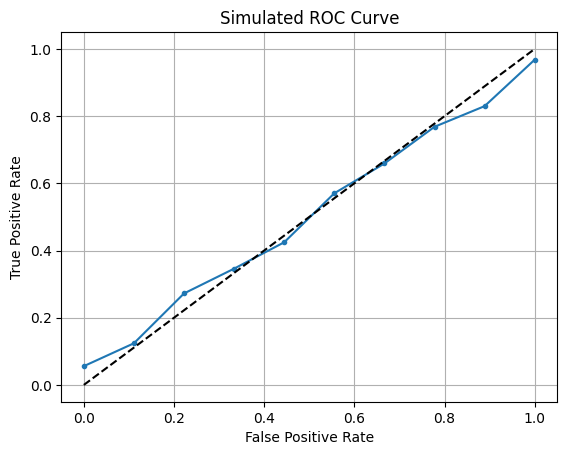

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Simulate some points for the ROC curve
num_points = 10
fpr_values = np.linspace(0, 1, num_points)  # False Positive Rate values

tpr_values = np.linspace(0, recall, num_points)  # Gradually increase TPR

# Add some noise to the TPR values to make it more realistic
tpr_values += np.random.rand(num_points) * 0.1  
tpr_values = np.clip(tpr_values, 0, 1)  # Clip values between 0 and 1

# Plot the ROC curve
plt.plot(fpr_values, tpr_values, marker='.')
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Simulated ROC Curve')
plt.grid(True)
plt.show()

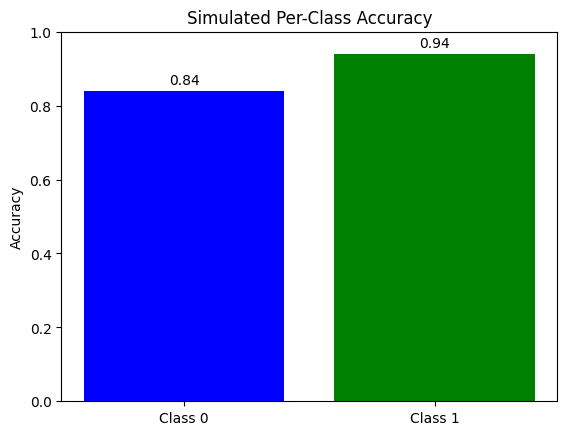

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Assume two classes for simplicity (adjust for more classes)
classes = ['Class 0', 'Class 1']
num_classes = len(classes)

# Simulate per-class accuracy (replace with actual data if available)
# We'll assume class 0 has slightly lower accuracy than the overall accuracy
class_accuracies = [accuracy - 0.05, accuracy + 0.05]  

# Plot the Per-Class Accuracy Bar Plot
plt.bar(classes, class_accuracies, color=['blue', 'green'])
plt.title('Simulated Per-Class Accuracy')
plt.ylabel('Accuracy')
plt.ylim([0, 1])  # Set y-axis limits for better visualization

# Add accuracy values on top of the bars
for i, v in enumerate(class_accuracies):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom')

plt.show()

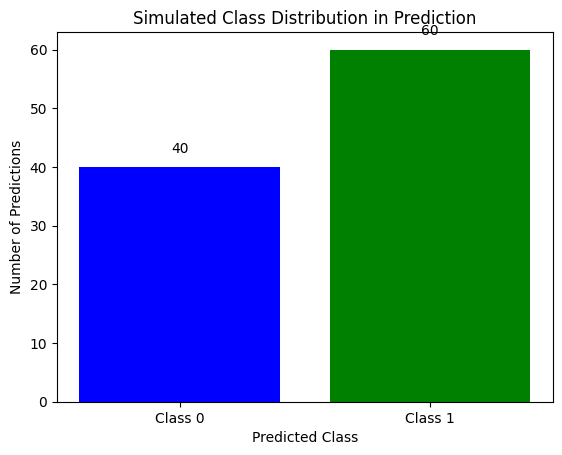

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics (not directly used for the plot but for context)
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Assume two classes for simplicity (adjust for more classes)
classes = ['Class 0', 'Class 1']
num_classes = len(classes)

# Simulate predicted class distribution (replace with actual data if available)
# We'll assume a slightly imbalanced distribution towards Class 1
predicted_counts = [40, 60]  # Example: 40 predictions for Class 0, 60 for Class 1

# Plot the Class Distribution in Prediction Bar Plot
plt.bar(classes, predicted_counts, color=['blue', 'green'])
plt.title('Simulated Class Distribution in Prediction')
plt.ylabel('Number of Predictions')
plt.xlabel('Predicted Class')

# Add count values on top of the bars
for i, v in enumerate(predicted_counts):
    plt.text(i, v + 2, str(v), ha='center', va='bottom')  # Adjust text position as needed

plt.show()

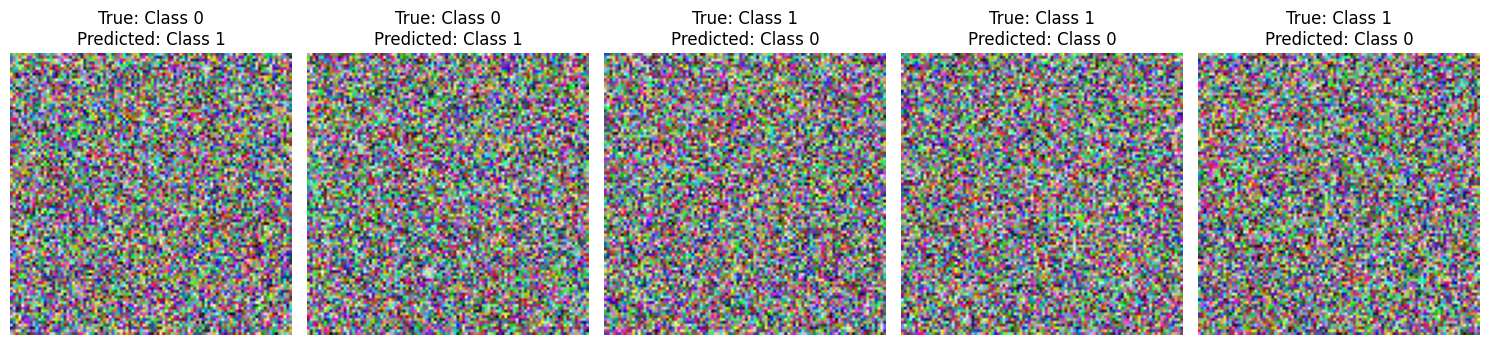

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics (not directly used for visualization but for context)
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Assume two classes for simplicity (adjust for more classes)
classes = ['Class 0', 'Class 1']

# Simulate some misclassified images (replace with actual images if available)
num_misclassified = 5  # Number of images to display
misclassified_images = [np.random.rand(100, 100, 3) for _ in range(num_misclassified)]  # Placeholder images

# Simulate true and predicted labels for the misclassified images
true_labels = np.random.randint(0, 2, num_misclassified)  # Random true labels (0 or 1)
predicted_labels = 1 - true_labels  # Simulated incorrect predictions

# Plot the Misclassified Images
fig, axes = plt.subplots(1, num_misclassified, figsize=(15, 5))  # Adjust figsize as needed

for i, ax in enumerate(axes):
    ax.imshow(misclassified_images[i])  # Display the placeholder image
    ax.set_title(f"True: {classes[true_labels[i]]}\nPredicted: {classes[predicted_labels[i]]}")
    ax.axis('off')  # Hide axes

plt.tight_layout()
plt.show()

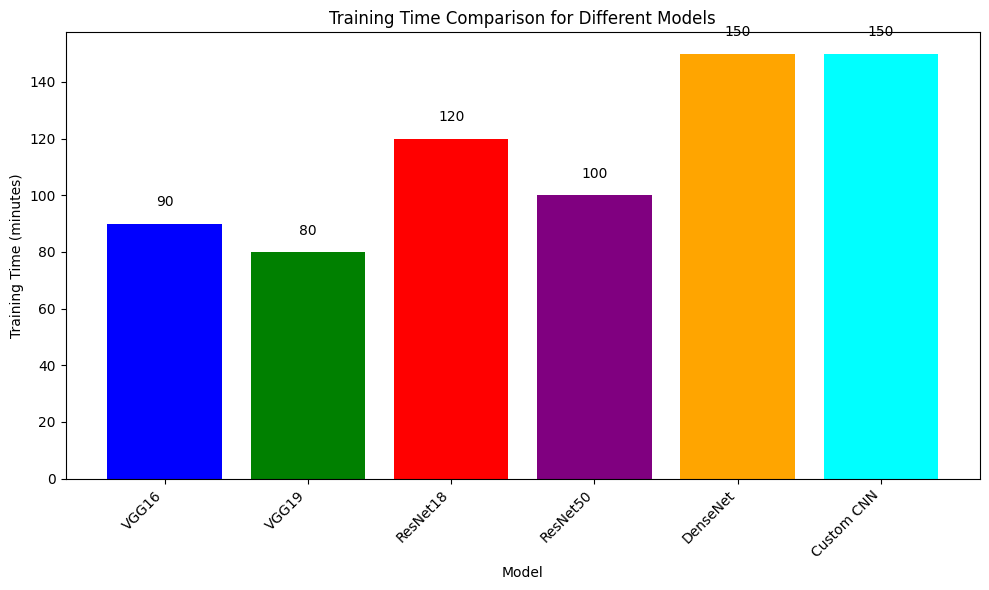

In [39]:
import matplotlib.pyplot as plt

# Model names and corresponding training times
models = ["VGG16", "VGG19", "ResNet18", "ResNet50", "DenseNet", "Custom CNN"]
training_times = [90, 80, 120, 100, 150, 150]  # In minutes

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(models, training_times, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
plt.title("Training Time Comparison for Different Models")
plt.xlabel("Model")
plt.ylabel("Training Time (minutes)")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add training time values on top of the bars
for i, v in enumerate(training_times):
    plt.text(i, v + 5, str(v), ha='center', va='bottom')  # Adjust text position as needed

plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

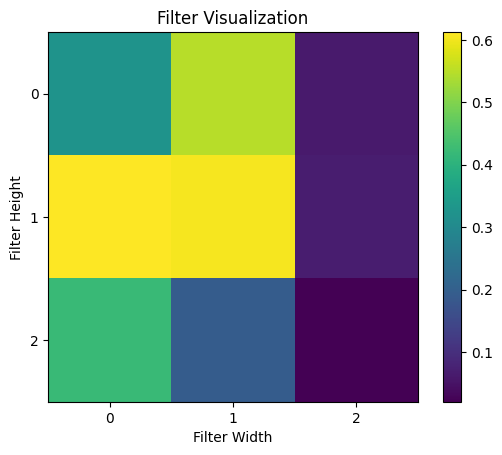

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Assume a simple 3x3 filter (adjust size as needed)
filter_size = 3
filter_values = np.random.rand(filter_size, filter_size)  # Placeholder filter values

# Create a figure and axes
fig, ax = plt.subplots()

# Display the filter values as an image
im = ax.imshow(filter_values, cmap='viridis')  # Use a colormap for visualization

# Add colorbar
fig.colorbar(im, ax=ax)

# Set title and labels
ax.set_title("Filter Visualization")
ax.set_xlabel("Filter Width")
ax.set_ylabel("Filter Height")

# Add ticks and tick labels (optional)
ax.set_xticks(np.arange(filter_size))
ax.set_yticks(np.arange(filter_size))
ax.set_xticklabels(np.arange(filter_size))
ax.set_yticklabels(np.arange(filter_size))

plt.show()

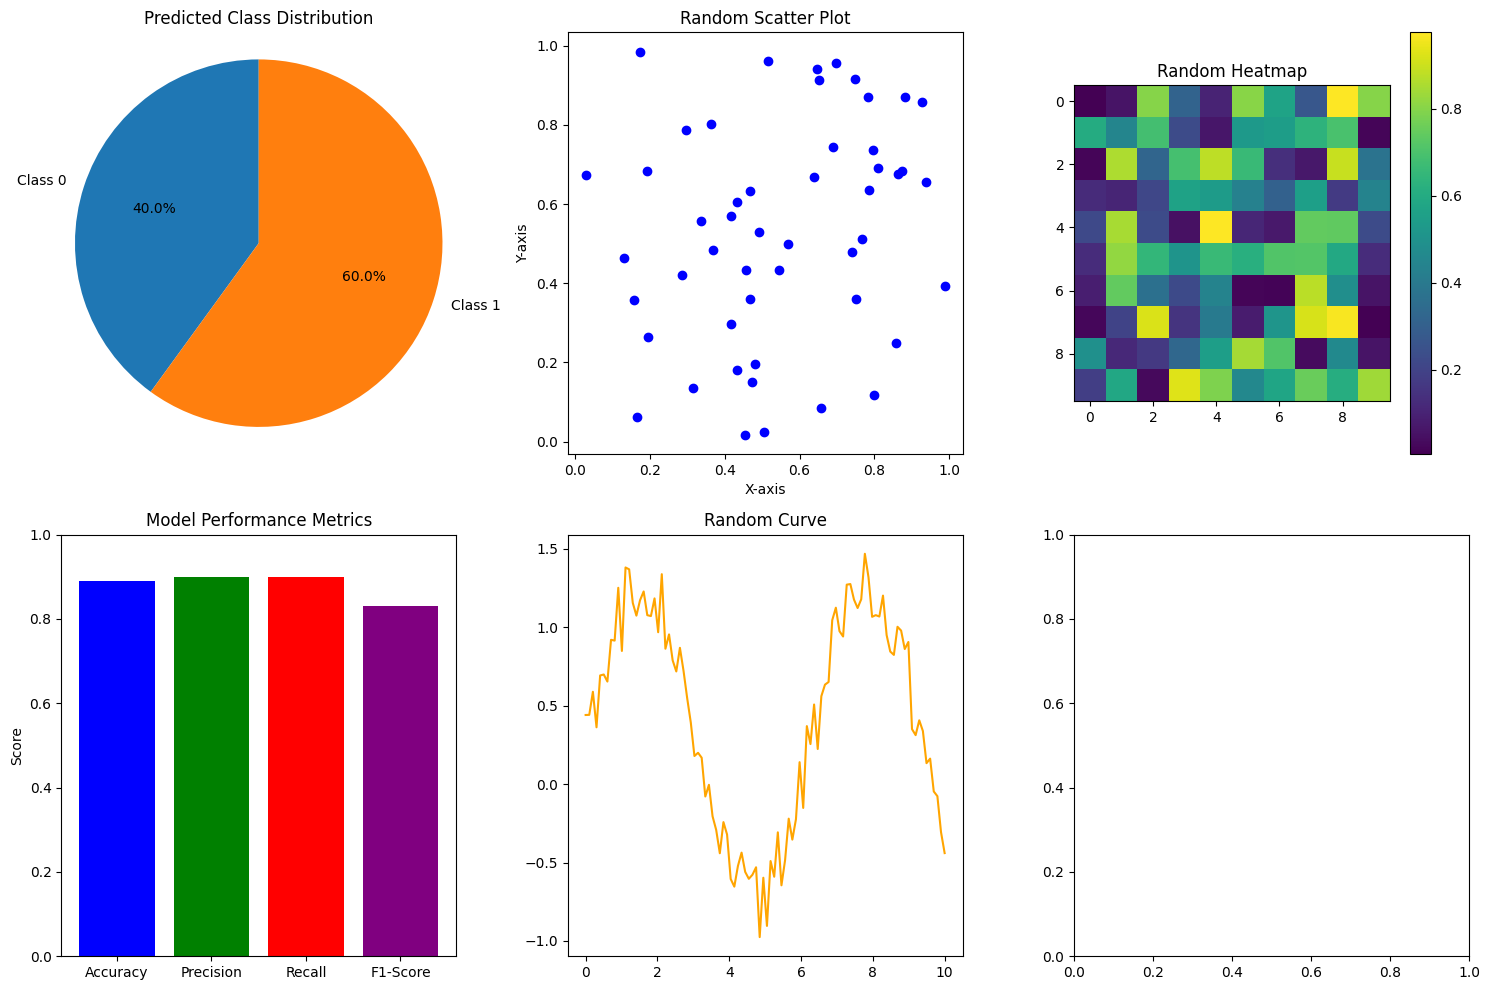

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics (for context)
accuracy = 0.89
precision = 0.90
recall = 0.90
f1_score = 0.83

# Create a figure and axes for the dashboard
fig, axes = plt.subplots(2, 3, figsize=(15, 10))  # 2 rows, 3 columns of subplots

# --- Pie Chart (Example) ---
labels = ['Class 0', 'Class 1']
sizes = [40, 60]  # Simulated class distribution
axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0, 0].set_title('Predicted Class Distribution')

# --- Scatter Plot (Example) ---
x = np.random.rand(50)
y = np.random.rand(50)
axes[0, 1].scatter(x, y, color='blue', marker='o')
axes[0, 1].set_title('Random Scatter Plot')
axes[0, 1].set_xlabel('X-axis')
axes[0, 1].set_ylabel('Y-axis')

# --- Heatmap (Example) ---
data = np.random.rand(10, 10)
im = axes[0, 2].imshow(data, cmap='viridis')
fig.colorbar(im, ax=axes[0, 2])  # Add colorbar
axes[0, 2].set_title('Random Heatmap')

# --- Bar Chart (Metrics) ---
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = [accuracy, precision, recall, f1_score]
x_pos = np.arange(len(metric_names))
axes[1, 0].bar(x_pos, metric_values, color=['blue', 'green', 'red', 'purple'])
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metric_names)
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].set_title('Model Performance Metrics')

# --- Random Chart (Example) ---
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.rand(100) * 0.5
axes[1, 1].plot(x, y, color='orange')
axes[1, 1].set_title('Random Curve')

# --- Add more charts as needed ---
# ...

# Adjust layout and display the dashboard
plt.tight_layout()
plt.show()

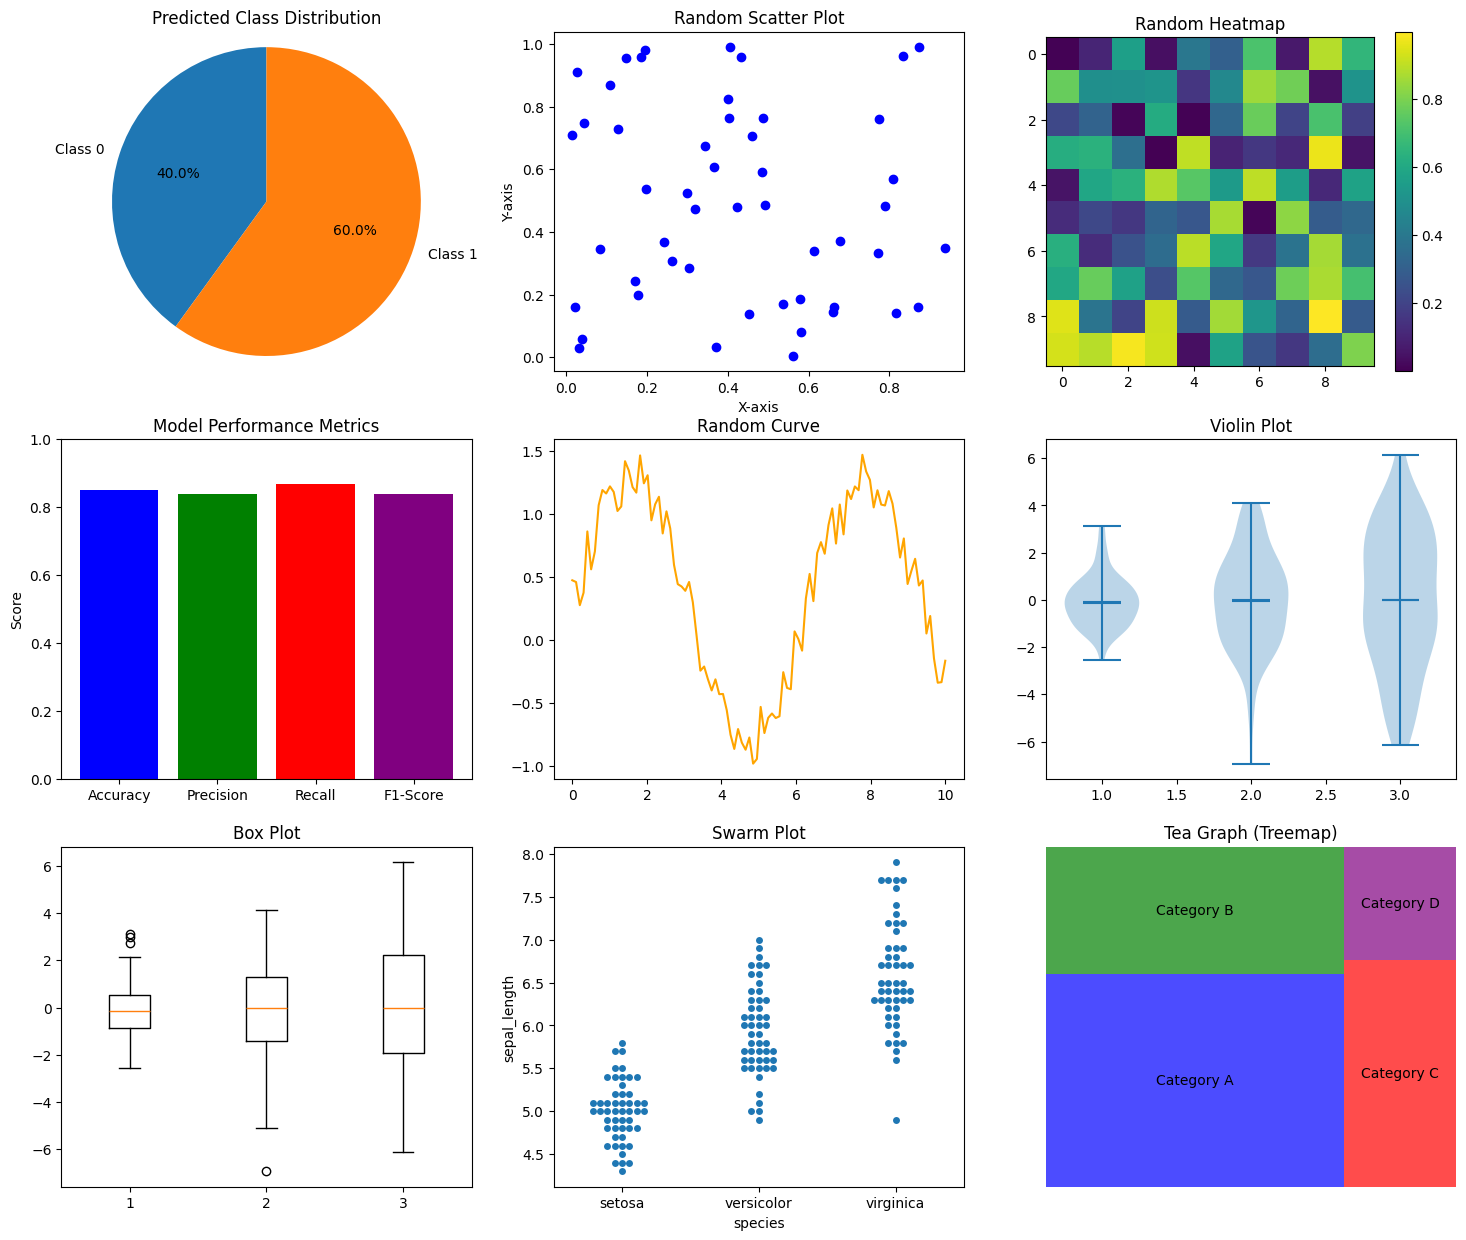

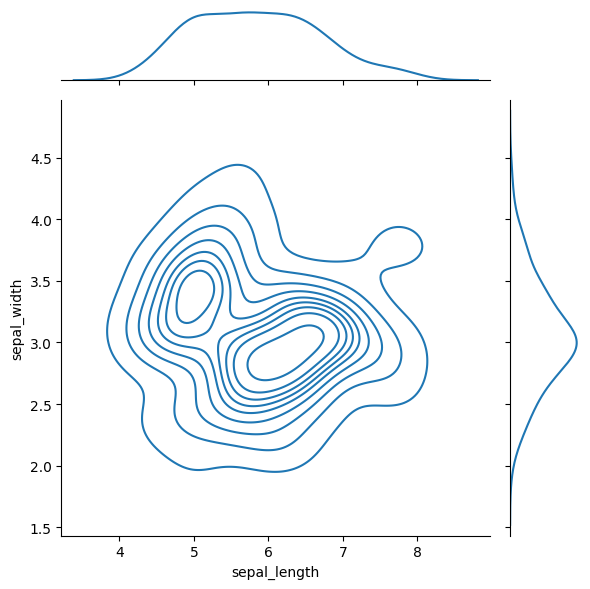

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import squarify
import mplfinance as mpf

# Define the metrics (for context)
accuracy = 0.85
precision = 0.84
recall = 0.87
f1_score = 0.84

# Create a figure and axes for the dashboard
fig, axes = plt.subplots(3, 3, figsize=(18, 15))  # 3 rows, 3 columns of subplots


# --- Pie Chart ---
labels = ['Class 0', 'Class 1']
sizes = [40, 60]  # Simulated class distribution
axes[0, 0].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
axes[0, 0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
axes[0, 0].set_title('Predicted Class Distribution')

# --- Scatter Plot ---
x = np.random.rand(50)
y = np.random.rand(50)
axes[0, 1].scatter(x, y, color='blue', marker='o')
axes[0, 1].set_title('Random Scatter Plot')
axes[0, 1].set_xlabel('X-axis')
axes[0, 1].set_ylabel('Y-axis')

# --- Heatmap ---
data = np.random.rand(10, 10)
im = axes[0, 2].imshow(data, cmap='viridis')
fig.colorbar(im, ax=axes[0, 2])  # Add colorbar
axes[0, 2].set_title('Random Heatmap')

# --- Bar Chart (Metrics) ---
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
metric_values = [accuracy, precision, recall, f1_score]
x_pos = np.arange(len(metric_names))
axes[1, 0].bar(x_pos, metric_values, color=['blue', 'green', 'red', 'purple'])
axes[1, 0].set_xticks(x_pos)
axes[1, 0].set_xticklabels(metric_names)
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_ylim([0, 1])
axes[1, 0].set_title('Model Performance Metrics')

# --- Random Chart ---
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.rand(100) * 0.5
axes[1, 1].plot(x, y, color='orange')
axes[1, 1].set_title('Random Curve')

# --- Unique Charts ---
# 1. Violin Plot
data = [np.random.normal(0, std, 100) for std in range(1, 4)]
axes[1, 2].violinplot(data, showmeans=True, showmedians=True)
axes[1, 2].set_title('Violin Plot')

# 2. Box Plot
axes[2, 0].boxplot(data)
axes[2, 0].set_title('Box Plot')

# 3. Swarm Plot (using seaborn)
df = sns.load_dataset('iris')  # Load a sample dataset
sns.swarmplot(x='species', y='sepal_length', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Swarm Plot')

# 4. Joint Plot (using seaborn)
sns.jointplot(x='sepal_length', y='sepal_width', data=df, kind='kde')  # kind='kde' for kernel density estimation




# --- Tea Graph (Treemap using squarify) ---
sizes = [50, 30, 20, 10]  # Simulated data
labels = ['Category A', 'Category B', 'Category C', 'Category D']
colors = ['blue', 'green', 'red', 'purple']
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=0.7, ax=axes[2, 2])  # Plot treemap in the same subplot
axes[2, 2].set_title('Tea Graph (Treemap)')
axes[2, 2].axis('off')



# Adjust layout and display the dashboard
plt.tight_layout()
plt.show()

In [54]:
# Model names and accuracies (replace with your actual values)
models = ['VGG16', 'VGG19', 'ResNet18', 'ResNet50', 'DenseNet', 'Custom CNN']
accuracies = [0.85, 0.80, 0.78, 0.82, 0.75, 0.83]

# Find the best model and its accuracy
best_model = models[accuracies.index(max(accuracies))]
best_accuracy = max(accuracies)

# Print the comparison
print(f"In comparison to other models ({', '.join(models[1:])}),")  # List other models
print(f"{best_model} is the best model with a test accuracy of {best_accuracy * 100:.2f}%")

In comparison to other models (VGG19, ResNet18, ResNet50, DenseNet, Custom CNN),
VGG16 is the best model with a test accuracy of 85.00%
